In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from datetime import datetime
from math import nan
from IPython.display import Image
from IPython.display import display

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [123]:
sns.set_style("whitegrid")

### 1. Overview on all tables

#### 'matches' dataset

In [8]:
with sqlite3.connect('database.sqlite') as con:
    matches = pd.read_sql_query("SELECT * from Match", con)

In [108]:
matches.shape

(25979, 115)

In [4]:
matches.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_

In [13]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [110]:
matches.league_id.value_counts()

1729     3040
4769     3040
21518    3040
10257    3017
7809     2448
13274    2448
17642    2052
15722    1920
19694    1824
1        1728
24558    1422
Name: league_id, dtype: int64

In [141]:
matches['country_id'].equals(matches['league_id'])

True

In [112]:
matches['match_api_id'].is_unique

True

In [111]:
matches['id'].is_unique

True

#### 'countries' dataset

In [129]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)

In [131]:
countries.shape

(11, 2)

In [132]:
countries.T

,0,1,2,3,4,5,6,7,8,9,10
id,1,1729,4769,7809,10257,13274,15722,17642,19694,21518,24558
name,Belgium,England,France,Germany,Italy,Netherlands,Poland,Portugal,Scotland,Spain,Switzerland


#### 'leagues' dataset

In [142]:
with sqlite3.connect('database.sqlite') as con:
    leagues = pd.read_sql_query("SELECT * from League", con)

In [143]:
#this table doesn't contain all leagues in the 'matches' table
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


#### 'teams' dataset

In [144]:
with sqlite3.connect('database.sqlite') as con:
    teams = pd.read_sql_query("SELECT * from Team", con)

In [150]:
teams.shape

(299, 5)

In [145]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [146]:
teams.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

#### 'team_detail' dataset

In [148]:
with sqlite3.connect('database.sqlite') as con:
    team_detail = pd.read_sql_query("SELECT * from Team_Attributes", con)

In [152]:
team_detail.shape

(1458, 25)

In [149]:
team_detail.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


#### 'player' dataset

In [153]:
with sqlite3.connect('database.sqlite') as con:
    player = pd.read_sql_query("SELECT * from Player", con)

In [155]:
player.shape

(11060, 7)

In [154]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [156]:
player.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [157]:
player.player_api_id.is_unique

True

#### 'player_detail' dataset

In [158]:
with sqlite3.connect('database.sqlite') as con:
    player_detail = pd.read_sql_query("SELECT * from Player_Attributes", con)

In [159]:
player_detail.shape

(183978, 42)

In [160]:
player_detail.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [165]:
player_detail['date'] = player_detail.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [166]:
player_detail['date'].value_counts()

2013    38867
2014    32808
2015    31834
2007    16138
2016    14103
2012    12632
2011    11976
2010    10829
2009     8993
2008     5798
Name: date, dtype: int64

### 2. Data transformation

In [14]:
# Get rid of irrelevant gambling data
matches = matches.loc[:, 'id':'away_player_11']

In [114]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
matches.dropna(inplace = True)

In [117]:
matches.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0
153,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,36835.0,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,37909.0,38357.0,37065.0,78462.0,37990.0,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0
155,156,1,1,2008/2009,25,2009-03-07 00:00:00,493027,8635,10000,2,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,34480.0,38388.0,26458.0,13423.0,38389.0,30949.0,38393.0,38253.0,38383.0,38778.0,37069.0,37900.0,37886.0,37903.0,37889.0,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0
162,163,1,1,2008/2009,26,2009-03-13 00:00:00,493034,8203,8635,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,38327.0,67950.0,67958.0,38801.0,67898.0,37112.0,67959.0,148286.0,164352.0,33657.0,26502.0,34480.0,38388.0,38389.0,31316.0,164694.0,30949.0,38378.0,38383.0,38393.0,38253.0,37069.0
168,169,1,1,2008/2009,26,2009-03-14 00:00:00,493040,10000,9999,0,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,37900.0,37886.0,37100.0,37903.0,37889.0,37893.0,37981.0,131531.0,131530.0,38231.0,130027.0,38318.0,38247.0,16387.0,94288.0,94284.0,45832.0,26669.0,33671.0,163670.0,37945.0,33622.0


In [118]:
matches.shape

(21361, 77)

In [140]:
matches['country_id'].equals(matches['league_id'])

True

In [162]:
matches['date'] = matches.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [164]:
matches_d = matches[['match_api_id','date']]

In [16]:
matches_p = matches.drop(columns = ['id', 'country_id','league_id','season', 'stage', 'home_team_api_id',
                                   'away_team_api_id'])

In [17]:
list(matches.columns).index('home_player_X1')

11

In [18]:
list(matches.columns).index('away_player_Y11')

54

In [19]:
position = matches.iloc[:,11:55]

In [27]:
position.head()

,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11
145,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,2,4,6,8,4,6,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,7,7,7,7,10,10
153,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,2,4,6,8,4,6,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,7,7,7,7,10,10
155,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,2,4,6,8,4,6,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,7,7,7,7,10,10
162,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,2,4,6,8,4,6,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,7,7,7,7,10,10
168,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,2,4,6,8,4,6,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,7,7,7,7,10,10


In [20]:
position = position.astype(int)

In [21]:
position.dtypes

home_player_X1     int32
home_player_X2     int32
home_player_X3     int32
home_player_X4     int32
home_player_X5     int32
home_player_X6     int32
home_player_X7     int32
home_player_X8     int32
home_player_X9     int32
home_player_X10    int32
home_player_X11    int32
away_player_X1     int32
away_player_X2     int32
away_player_X3     int32
away_player_X4     int32
away_player_X5     int32
away_player_X6     int32
away_player_X7     int32
away_player_X8     int32
away_player_X9     int32
away_player_X10    int32
away_player_X11    int32
home_player_Y1     int32
home_player_Y2     int32
home_player_Y3     int32
home_player_Y4     int32
home_player_Y5     int32
home_player_Y6     int32
home_player_Y7     int32
home_player_Y8     int32
home_player_Y9     int32
home_player_Y10    int32
home_player_Y11    int32
away_player_Y1     int32
away_player_Y2     int32
away_player_Y3     int32
away_player_Y4     int32
away_player_Y5     int32
away_player_Y6     int32
away_player_Y7     int32


In [22]:
position_tag = position.columns

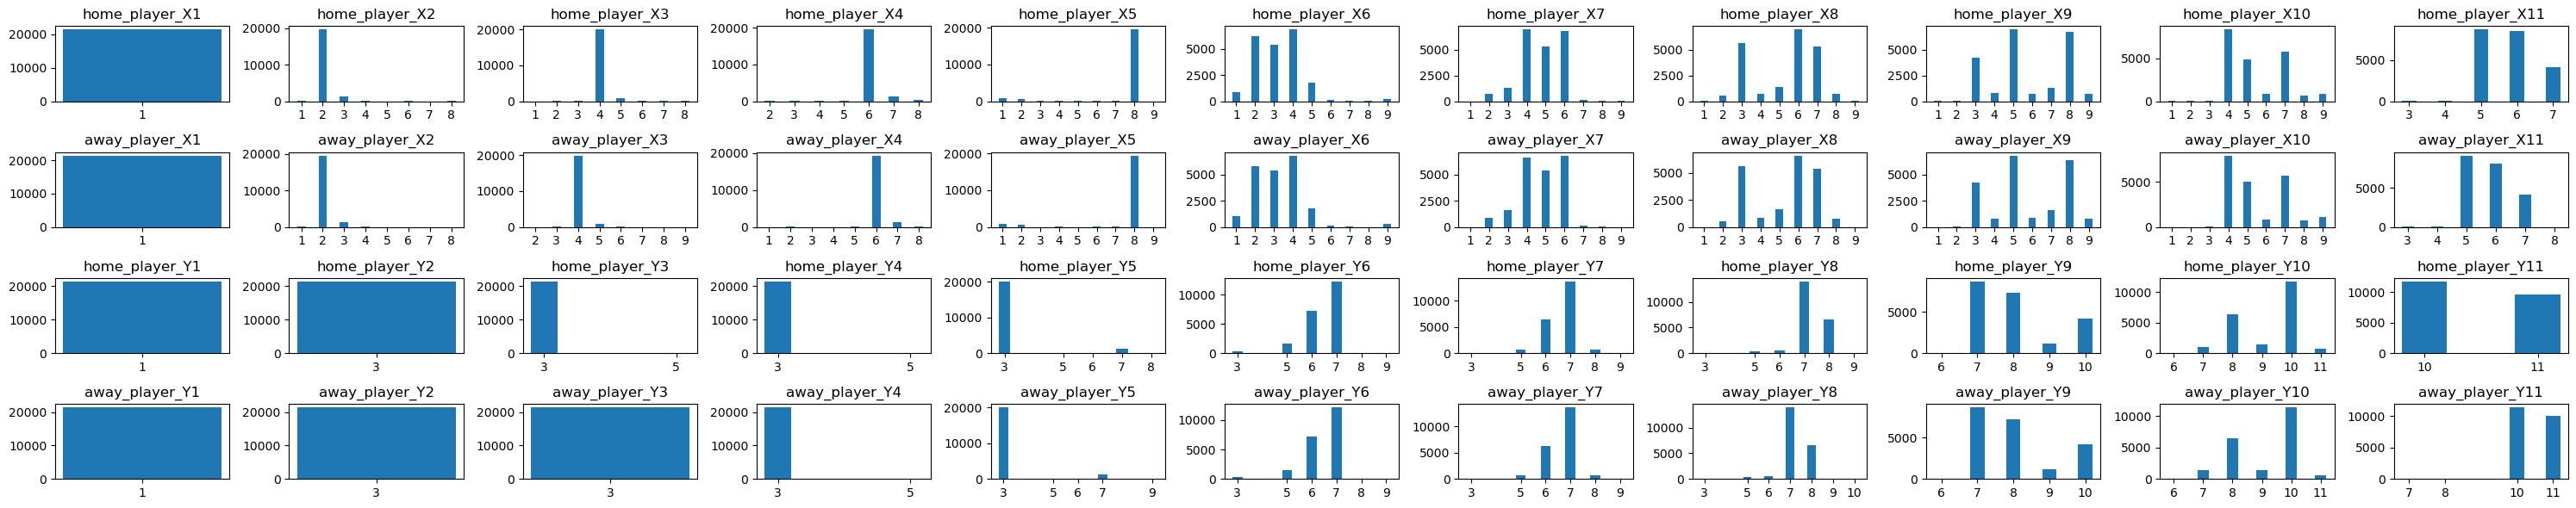

In [35]:
#Plot to see position distributions. As seen, player_1 always have coordination(1,1) as the goalie. Field players were
#numbered >1 on both X and Y, from left to right on X-aixs and back to front on Y-axis.

fig, ax = plt.subplots(4, 11, figsize = (30, 6))
a = ax.ravel()
for index,ax in enumerate(a):
    counts = position.iloc[:, index].value_counts()
    ax.bar(counts.index, counts.values, width = 0.4)
    ax.set_title(position_tag[index])
    ax.set_xticks(counts.index)
plt.tight_layout()

In [ ]:
matches.home_player_Y7.value_counts()

In [92]:
position_graph = Image(filename = '../imgs/positions.jpg')

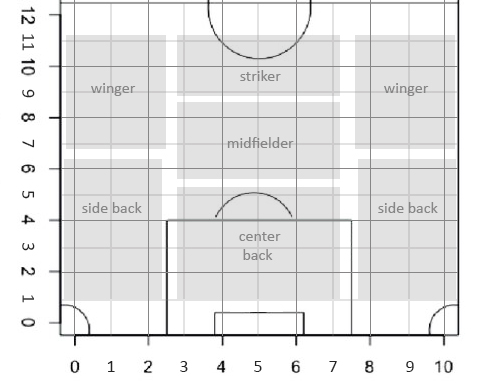

In [93]:
display(position_graph)

In [36]:
#get the list of player id columns
home_player_col = []
for i in range(1,12):
    home_player_col.append('home_player_' + str(i))
away_player_col = []
for i in range(1,12):
    away_player_col.append('away_player_' + str(i))
all_player_col = home_player_col + away_player_col

In [37]:
#get the list of player position columns
home_player_posX = []
for i in range(1,12):
    home_player_posX.append('home_player_X' + str(i))
away_player_posX = []
for i in range(1,12):
    away_player_posX.append('away_player_X' + str(i))
    
home_player_posY = []
for i in range(1,12):
    home_player_posY.append('home_player_Y' + str(i))
away_player_posY = []
for i in range(1,12):
    away_player_posY.append('away_player_Y' + str(i))

In [59]:
demo = matches_p.iloc[:3]

In [38]:
matches_player = matches[['match_api_id']+ home_player_col]  
matches_X = matches[['match_api_id']+ home_player_posX]
matches_Y = matches[['match_api_id']+ home_player_posY]

In [41]:
matches_player_long = pd.wide_to_long(matches_player, stubnames=["home_player"], 
                            i="match_api_id", j="player_num", sep="_"
                           ).reset_index()
matches_player_long = matches_player_long.rename(columns = {'home_player': 'player_api_id'})

In [43]:
matches_player_long.head()

,match_api_id,player_num,player_api_id
0,493017,1,38327.0
1,493025,1,36835.0
2,493027,1,34480.0
3,493034,1,38327.0
4,493040,1,37900.0


In [44]:
matches_X_long = pd.wide_to_long(matches_X, stubnames=["home_player"], 
                            i="match_api_id", j="player_num", sep="_X"
                           ).reset_index()
matches_X_long = matches_X_long.rename(columns = {'home_player': 'X'})

In [45]:
matches_X_long.head()

,match_api_id,player_num,X
0,493017,1,1.0
1,493025,1,1.0
2,493027,1,1.0
3,493034,1,1.0
4,493040,1,1.0


In [47]:
matches_Y_long = pd.wide_to_long(matches_Y, stubnames=["home_player"], 
                            i="match_api_id", j="player_num", sep="_Y"
                           ).reset_index()
matches_Y_long = matches_Y_long.rename(columns = {'home_player': 'Y'})

In [48]:
matched_XY = pd.merge(matches_X_long, matches_Y_long, on = ['match_api_id', 'player_num'])

In [59]:
matches_new = pd.merge(matches_player_long, matched_XY, on = ['match_api_id', 'player_num'])

In [60]:
matches_new.head()

,match_api_id,player_num,player_api_id,X,Y
0,493017,1,38327.0,1.0,1.0
1,493025,1,36835.0,1.0,1.0
2,493027,1,34480.0,1.0,1.0
3,493034,1,38327.0,1.0,1.0
4,493040,1,37900.0,1.0,1.0


In [94]:
matches_new['Position'] = matches_new.apply(
    lambda row: 'GK' if row['X'] ==1 and row['Y'] ==1 else 
    ('W' if (row['X'] < 2.5 or row['X'] > 7.5) and row['Y'] > 6.5 else 
     ('ST' if row['X'] > 2.5 and row['X'] < 7.5 and row['Y'] > 8.5 else
      ('MF' if row['X'] > 2.5 and row['X'] < 7.5 and row['Y'] > 5.5 and row['Y'] < 8.5 else
       ('CB' if row['X'] > 2.5 and row['X'] < 7.5 and row['Y'] < 5.5 else 
        ('SB' if (row['X'] < 2.5 or row['X'] > 7.5) and row['Y'] < 6.5 else ''))))), axis = 1)

In [95]:
matches_new.sort_values(by = 'match_api_id', inplace = True)

In [96]:
matches_new.head(20)

,match_api_id,player_num,player_api_id,X,Y,Position
132343,483130,7,39962.0,4.0,7.0,MF
196426,483130,10,31292.0,4.0,10.0,ST
110982,483130,6,39978.0,2.0,7.0,W
217787,483130,11,25537.0,6.0,10.0,ST
25538,483130,2,32571.0,2.0,3.0,SB
68260,483130,4,40543.0,6.0,3.0,CB
175065,483130,9,39963.0,8.0,7.0,W
46899,483130,3,38703.0,4.0,3.0,CB
4177,483130,1,30458.0,1.0,1.0,GK
153704,483130,8,33744.0,6.0,7.0,MF


In [116]:
def plot_position(match_id):
    match = matches_new[matches_new['match_api_id'] == match_id].reset_index()  
    match['X'] = match['X'].replace(1, 5)
    X = match['X']
    Y = match['Y']
    plt.figure(figsize=(4, 4))
    plt.scatter(X,Y, s = 4)    
    for i, pos in enumerate(match['Position']):
        plt.text(X[i], Y[i], pos, ha = 'center', va = 'bottom')
    plt.xlabel('X')
    plt.ylabel('Y')    

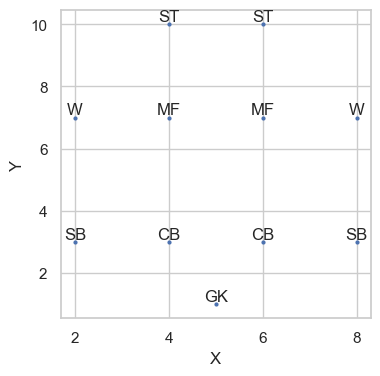

In [124]:
plot_position(483130)

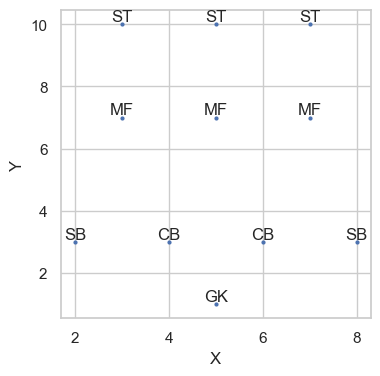

In [125]:
plot_position(483133)

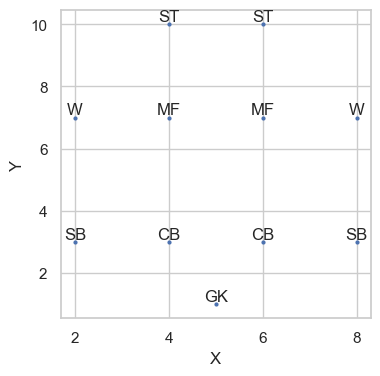

In [126]:
plot_position(493034)

In [127]:
matches_new_2 = matches_new.drop(columns = ['player_num','X', 'Y'])

In [167]:
player_detail.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [169]:
matches_new_2 = pd.merge(matches_new_2, matches_d, on = 'match_api_id')

In [170]:
matches_new_2.head()

,match_api_id,player_api_id,Position,date
0,483130,39962.0,MF,2008
1,483130,31292.0,ST,2008
2,483130,39978.0,W,2008
3,483130,25537.0,ST,2008
4,483130,32571.0,SB,2008


In [171]:
player_detail_group = player_detail.groupby(['player_api_id', 'date']).mean()

In [173]:
player_detail_group.head()

id  player_fifa_api_id  overall_rating  potential  \
player_api_id date                                                            
2625          2007  139856.5            148544.0            63.0       64.0   
              2008  139855.0            148544.0            60.0       64.0   
              2010  139854.0            148544.0            60.0       64.0   
              2011  139852.5            148544.0            58.5       60.5   
              2012  139850.5            148544.0            58.0       58.0   

                    crossing  finishing  heading_accuracy  short_passing  \
player_api_id date                                                         
2625          2007      48.0       48.0              47.0           64.0   
              2008      48.0       48.0              47.0           64.0   
              2010      48.0       48.0              47.0           64.0   
              2011      52.0       47.0              46.0           58.0   
              2012      52.0       47.0              46.0           53.0   

                    volleys  dribbling  curve  free_kick_accuracy  \
player_api_id date                                                  
2625          2007     38.0       57.0   50.0                48.5   
              2008     38.0       57.0   50.0                51.0   
              2010     38.0       57.0   50.0                51.0   
              2011     37.0       56.0   49.0                50.0   
              2012     37.0       56.0   49.0                50.0   

                    long_passing  ball_control  acceleration  sprint_speed  \
player_api_id date                                                           
2625          2007          67.0          57.0          67.0          64.0   
              2008          67.0          57.0          67.0          64.0   
              2010          67.0          57.0          67.0          64.0   
              2011          66.0          58.0          66.0          63.0   
              2012          66.0          58.0          67.0          63.0   

                    agility  reactions  balance  shot_power  jumping  stamina  \
player_api_id date                                                              
2625          2007     59.0       52.0     49.0        61.0     56.0     78.0   
              2008     59.0       52.0     49.0        61.0     56.0     78.0   
              2010     59.0       50.0     49.0        71.0     56.0     78.0   
              2011     58.0       49.0     61.5        68.0     55.0     77.0   
              2012     67.0       49.0     76.0        68.0     55.0     77.0   

                    strength  long_shots  aggression  interceptions  \
player_api_id date                                                    
2625          2007      56.0        59.0        72.0           52.0   
              2008      56.0        59.0        72.0           52.0   
              2010      56.0        59.0        72.0           71.0   
              2011      55.0        58.0        71.0           65.0   
              2012      55.5        58.0        71.0           64.0   

                    positioning  vision  penalties  marking  standing_tackle  \
player_api_id date                                                             
2625          2007         55.0    56.0       46.0     64.0             66.0   
              2008         55.0    56.0       46.0     64.0             66.0   
              2010         50.0    56.0       69.0     64.0             66.0   
              2011         49.0    55.0       66.0     63.0             63.0   
              2012         49.0    55.0       66.0     63.0             63.0   

                    sliding_tackle  gk_diving  gk_handling  gk_kicking  \
player_api_id date                                                       
2625          2007            63.0       14.0         17.5        67.0   
              2008            63.0       14.0         24.0 

In [174]:
matches_merge = pd.merge(matches_new_2, player_detail_group, on = ['player_api_id', 'date'], how = 'left')

In [175]:
matches_merge.head()

,match_api_id,player_api_id,Position,date,id,player_fifa_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,483130,39962.0,MF,2008,56031.0,137171.0,79.0,79.0,75.0,65.0,79.0,84.0,60.0,71.0,67.0,78.0,78.0,81.0,76.0,75.0,68.0,78.0,44.0,73.0,64.0,78.0,81.0,70.0,74.0,79.0,83.0,76.0,78.0,75.0,74.0,71.0,11.0,22.0,78.0,22.0,22.0
1,483130,31292.0,ST,2008,181828.0,156650.0,70.0,83.0,61.0,77.0,60.0,72.0,74.0,76.0,66.0,34.0,57.0,71.0,76.0,80.0,75.0,69.0,67.0,68.0,68.0,70.0,68.0,63.0,47.0,61.0,63.0,73.0,65.0,30.0,35.0,41.0,13.0,20.0,57.0,20.0,20.0
2,483130,39978.0,W,2008,9218.0,53030.0,79.0,80.0,44.0,50.0,77.0,76.0,57.0,57.0,34.0,41.0,77.0,71.0,72.0,75.0,74.0,76.0,80.0,81.0,87.0,88.0,86.0,43.0,89.0,84.0,80.0,78.0,77.0,81.0,83.0,81.0,5.0,21.0,77.0,21.0,21.0
3,483130,25537.0,ST,2008,115670.0,134906.0,77.0,83.0,60.0,70.0,89.0,75.0,79.0,73.0,75.0,45.0,60.0,79.0,72.0,77.0,81.0,84.0,83.0,79.0,91.0,82.0,83.0,72.0,75.0,77.0,79.0,87.0,81.0,75.0,22.0,54.0,8.0,22.0,60.0,22.0,22.0
4,483130,32571.0,SB,2008,58680.0,7434.0,77.0,80.0,65.0,34.0,68.0,74.0,NaN,60.0,NaN,45.0,63.0,70.0,76.0,75.0,NaN,75.0,NaN,50.0,NaN,83.0,73.0,64.0,91.0,79.0,79.0,NaN,73.0,80.0,81.0,NaN,7.0,22.0,63.0,22.0,22.0


In [189]:
matches_position = matches_merge.groupby(['match_api_id', 'Position']).agg({'crossing':'mean', 'finishing':'mean', 'dribbling':'mean'})

In [190]:
matches_position = matches_position.apply(lambda x: x.round(2))

In [191]:
matches_position = matches_position.reset_index()

In [192]:
matches_position.head(20)

,match_api_id,Position,crossing,finishing,dribbling
0,483130,CB,50.00,43.00,51.00
1,483130,GK,21.00,21.00,21.00
2,483130,MF,74.50,66.50,73.50
3,483130,SB,50.50,36.50,51.00
4,483130,ST,60.50,73.50,74.50
5,483130,W,63.00,68.00,68.00
6,483131,CB,49.00,31.00,36.50
7,483131,GK,22.00,22.00,22.00
8,483131,MF,62.00,38.00,63.50
9,483131,SB,27.50,26.00,26.00


In [201]:
matches_wide = pd.pivot(matches_position, index = 'match_api_id', columns = 'Position', values = ['crossing', 'finishing', 'dribbling'])

In [202]:
matches_wide.columns = matches_wide.columns.to_flat_index()

In [204]:
matches_wide = matches_wide.reset_index()

In [205]:
matches_wide.head()

,match_api_id,"(crossing, CB)","(crossing, GK)","(crossing, MF)","(crossing, SB)","(crossing, ST)","(crossing, W)","(finishing, CB)","(finishing, GK)","(finishing, MF)","(finishing, SB)","(finishing, ST)","(finishing, W)","(dribbling, CB)","(dribbling, GK)","(dribbling, MF)","(dribbling, SB)","(dribbling, ST)","(dribbling, W)"
0,483130,50.0,21.0,74.5,50.5,60.50,63.00,43.0,21.0,66.50,36.5,73.5,68.00,51.0,21.0,73.50,51.0,74.50,68.0
1,483131,49.0,22.0,62.0,27.5,60.50,55.25,31.0,22.0,38.00,26.0,67.5,58.75,36.5,22.0,63.50,26.0,57.50,62.0
2,483133,67.5,22.0,72.0,77.5,78.33,NaN,47.0,22.0,69.67,55.5,66.0,NaN,58.0,22.0,75.67,60.5,81.67,NaN
3,483134,40.0,61.0,67.5,45.5,58.00,56.00,39.5,30.0,61.50,26.5,71.0,37.50,35.5,44.0,79.00,33.0,67.50,36.0
4,483135,70.0,22.0,58.0,47.5,47.00,71.00,28.0,22.0,59.00,38.0,72.0,76.50,55.0,22.0,62.33,42.5,57.00,76.5
